# Confidence Intervals

### Table of Contents

- [Average Height in Non-coffee Drinkers](#avg_h)
- [Difference in Means](#diff_means)

In [2]:
os.chdir('projects_on_GitHub/POC/python_probability_practices')

<a id='avg_h'></a>
## Building Confidence Intervals

Under the folder find a file called `coffee_dataset.csv` which stores people's age, height and whether or not they're coffee drinkers.

In [3]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [6]:
np.random.seed(42)
coffee_red = coffee_full.sample(200)
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [11]:
drinker_prop = (coffee_red.drinks_coffee==True).mean()
drinker_prop

# drinker_prop = coffee_red.query('drinks_coffee==True').shape[0]/coffee_red.shape[0]

0.595

In [5]:
non_drinker_prop = (coffee_red.drinks_coffee==False).mean()
non_drinker_prop

0.405

In [6]:
print("{} -- coffee drinkers proportion in the sample.\n{} -- non-coffee drinkers proportion in the sample.".format(drinker_prop, \
                                                                                                                    non_drinker_prop))


0.595 -- coffee drinkers proportion in the sample.
0.405 -- non-coffee drinkers proportion in the sample.


`2.` Of the individuals who do not drink coffee, what is the average height?

In [7]:
# coffee_red.query('drinks_coffee==False').height.mean()

h_mean_non = coffee_red[coffee_red.drinks_coffee==False].height.mean()
print("{:.2f} -- Avg. height for non-drinkers in the sample.".format(h_mean_non))

66.78 -- Avg. height for non-drinkers in the sample.


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [8]:
sample200 = coffee_red.sample(200, replace=True)

drinker_prop = (sample200.drinks_coffee==True).mean()
non_drinker_prop = 1 - drinker_prop

print("{} -- coffee drinkers proportion in the sample.\n{} -- non-coffee drinkers proportion in the sample.".format(drinker_prop, \
                                                                                                                    non_drinker_prop))


0.605 -- coffee drinkers proportion in the sample.
0.395 -- non-coffee drinkers proportion in the sample.


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample.  Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [ ]:
s200_means = []
for _ in range(10000):
    s200 = coffee_red.sample(200, replace=200)
    s200_means.append(s200.query('drinks_coffee==False').height.mean())

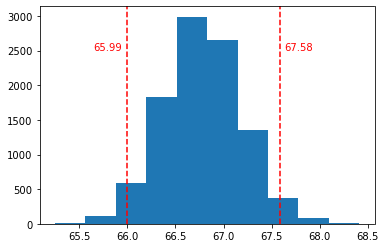

In [50]:
lower_bound = np.percentile(s200_means, 2.5)
upper_bound = np.percentile(s200_means, 97.5)

plt.hist(s200_means)
plt.axvline(lower_bound, color='red', linestyle='--')
plt.text(lower_bound-.35, 2500, s="{:.2f}".format(lower_bound), color='red')

plt.axvline(upper_bound, color='red', linestyle='--')
plt.text(upper_bound+.05, 2500, s="{:.2f}".format(upper_bound), color='red');

___Comment:___ From above, it looks pretty normal.

In [51]:
# 95% confidence interval
lower_bound, upper_bound

(65.99291328157521, 67.58402738281573)

In [54]:
# mean of sample distribution
mean_means_height = np.array(s200_means).mean()
print("{:.2f} -- mean of sample means pf height.".format(mean_means_height))

66.78 -- mean of sample means pf height.


`5.`  Did your interval capture the actual average height of coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [55]:
# population mean
coffee_full.query('drinks_coffee==False').height.mean()

66.44340776214703

In [12]:
# mean height for non-coffee drinkers in population
mean_h_pop = coffee_full[coffee_full.drinks_coffee==False].height.mean()
# mean_h_pop = coffee_full.query('drinks_coffee==False').height.mean()

print("{:.2f} -- Avg. height of non-drinkers in the population.".format(mean_h_pop))

66.44 -- Avg. height of non-drinkers in the population.


___Insight:___ 
- The mean height of non-coffee drinkers in the population was captured by the confidence interval in our sampling distribution.
- The mean height of non-coffee drinkers in the population, however, was not exactly the same as the mean of our sampling distribution (for non-coffee drinkers).

In [58]:
pwd

'/Users/alejandrosanz/Downloads/projects_on_GitHub/POC/python_probability_practices'

<a id='diff_means'></a>
## Difference in Means

In [13]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [14]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.

(0.10258900080921124, 2.538833370796657)

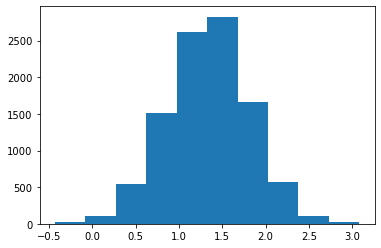

In [15]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_mean = boot_samp[boot_samp.drinks_coffee==True].height.mean()
    no_coff_mean = boot_samp[boot_samp.drinks_coffee==False].height.mean()
    diff = coff_mean - no_coff_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, .5), np.percentile(diffs, 99.5)

___Comment:___ statistical evidence coffee drinkers are on average taller.

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.

(3.3652749452554795, 5.0932450670661495)

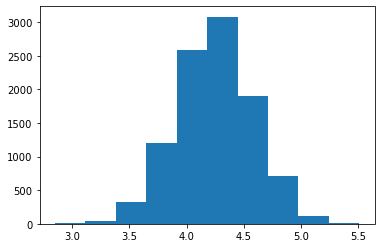

In [16]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    under21_mean = boot_samp[boot_samp.age=='<21'].height.mean()
    over21_mean = boot_samp[boot_samp.age=='>=21'].height.mean()
    diff = over21_mean - under21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, .5), np.percentile(diffs, 99.5)

___comment:___ Statistical evidence that over 21 y/o are on average taller.

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.

(1.0593651244624267, 2.593155794067904)

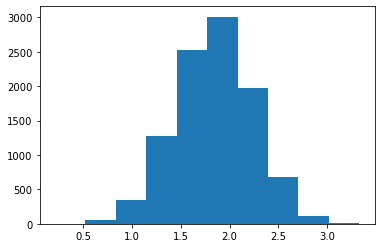

In [17]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_under21_mean = boot_samp[(boot_samp.age=='<21') & (boot_samp.drinks_coffee==True)].height.mean()
    no_coff_under21_mean = boot_samp[(boot_samp.age=='<21') & (boot_samp.drinks_coffee==False)].height.mean()
    diff = no_coff_under21_mean - coff_under21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

___Comment:___ For the under21 group, we have evidence that the non-coffee drinkers are on average taller.

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below.

(1.8278953970883667, 4.402632965477434)

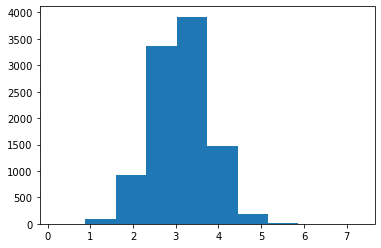

In [18]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_over21_mean = boot_samp[(boot_samp.age=='>=21') & (boot_samp.drinks_coffee==True)].height.mean()
    no_coff_over21_mean = boot_samp[(boot_samp.age=='>=21') & (boot_samp.drinks_coffee==False)].height.mean()
    diff = no_coff_over21_mean - coff_over21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

___Comment:___ For the over21 group, we have evidence that on average the non-coffee drinkers are taller.

# Conclusions:

Within the ___under 21___ and ___over 21___ groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a __misleading result__.  